In [6]:
import emcee
import corner
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
import getdist
import IPython
import numpy as np

%matplotlib inline

In [7]:
# import h5py

# with h5py.File("mcmc_test.h5", "r") as f:
#     print(list(f.keys()))

Removed no burn in


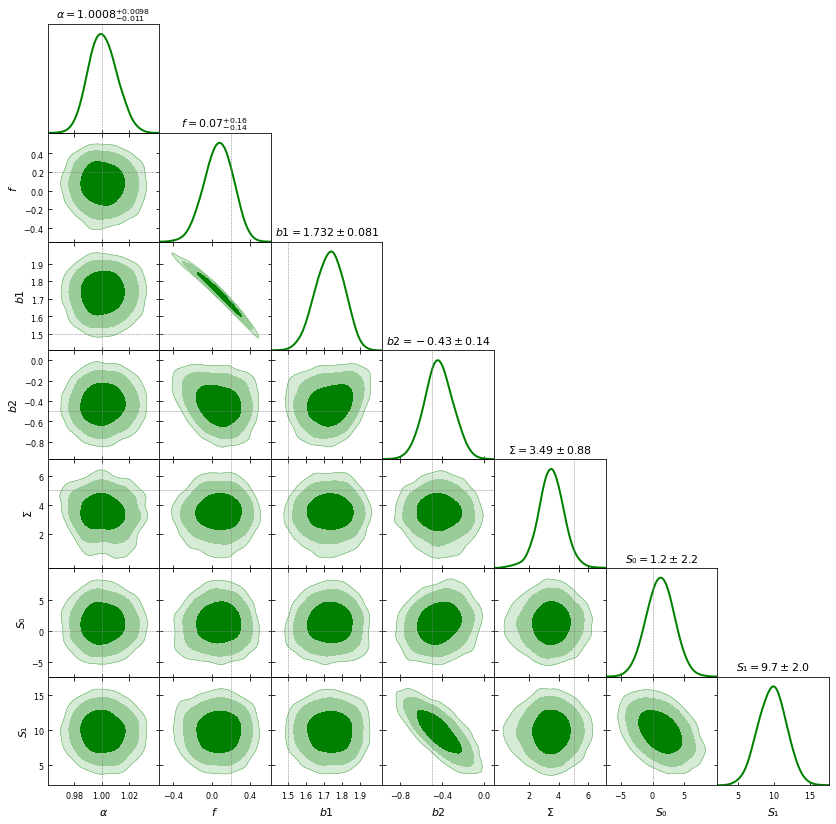

In [10]:
reader = emcee.backends.HDFBackend("/global/homes/s/shreeb/Project1/nobao_project/draft_mcmc/mcmc2_7_camb_67773070_matterpower_z0.5_0060.h5",read_only=True)

truth = {"\u03B1" : 1, "f" : 0.2 ,"b1": 1.5, "b2" : -0.5 , r'\Sigma' : 5, 'S\u2080' :0, 'S\u2081' : 0}
labels=["\u03B1","f", "b1", "b2", r"\Sigma",  'S\u2080',  'S\u2081']

samples = MCSamples(samples = reader.get_chain(discard=500, flat=True, thin=5), names = labels, labels = labels)
# Triangle plot
g = plots.get_subplot_plotter(analysis_settings={'ignore_rows': 0, 'contours':[0.68, 0.95, 0.99]});
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.4
g.settings.title_limit_fontsize = 14
g.settings.num_plot_contours = 3
g.triangle_plot([samples],title_limit=1, filled=True,contour_colors = ['green','darkblue'],line_args = [{'lw':2, 'color':'green'},
                {'lw':2, 'color':'darkblue'}],markers= truth)

plt.savefig("image1.png")
plt.show()


/tmp/ipykernel_37613/1114966093.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  ax[i].plot(samples[:, :, i], '-k', alpha=0.3 , color="magenta");
/tmp/ipykernel_37613/1114966093.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  ax[i].plot(samples[:, :, i], '-k', alpha=0.3 , color="magenta");
/tmp/ipykernel_37613/1114966093.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  ax[i].plot(samples[:, :, i], '-k', alpha=0.3 , color="magenta");
/tmp/ipykernel_37613/1114966093.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  ax[i].plot(sample

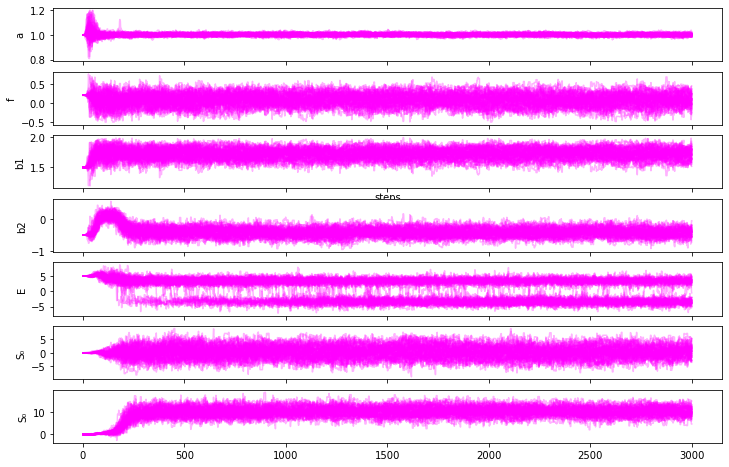

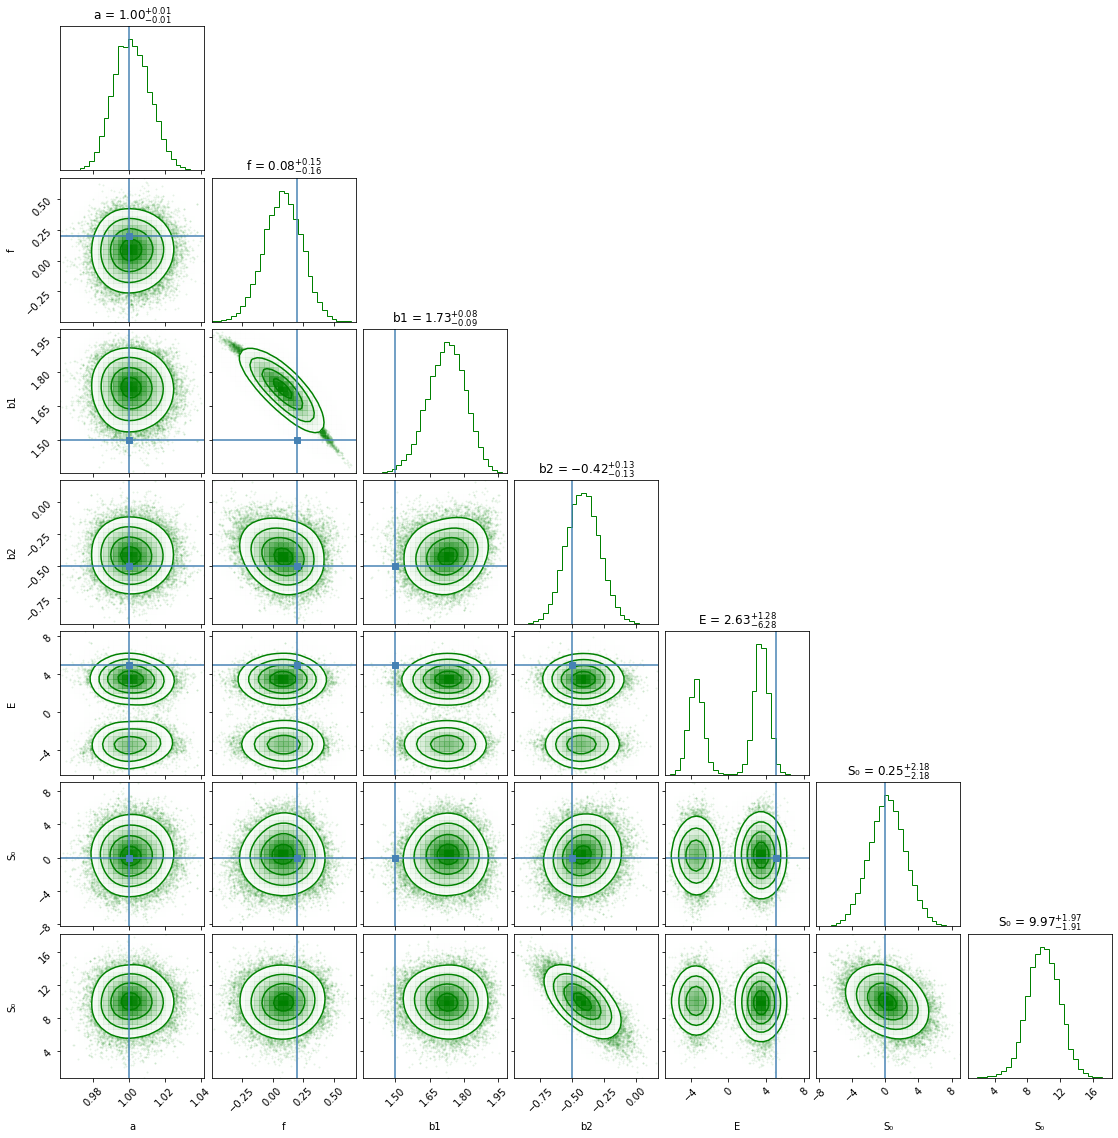

In [6]:
reader = emcee.backends.HDFBackend("/global/homes/s/shreeb/Project1/nobao_project/beocat_mcmc_results/mcmc_results_new/mcmc_camb_67773070_matterpower_z0.5_0060.h5",read_only=True)
samples = reader.get_chain()
fig, ax = plt.subplots(7, figsize=(12, 8), sharex=True)
ylabels = ['a','f','b1','b2' , "E",'S\u2080','S\u2080']
for i in range(7):
    ax[i].set_ylabel(ylabels[i])
    ax[i].plot(samples[:, :, i], '-k', alpha=0.3 , color="magenta");
ax[2].set_xlabel('steps')

samples = reader.get_chain(discard=200, flat=True, thin=5)
fig = corner.corner(samples, bins=30,smooth=2, labels=["a","f", "b1", 'b2',"E",'S\u2080','S\u2080'],truths=[1, 0.2, 1.5, -0.5,5,0,0],show_titles=True,color = "green")

In [5]:
reader = emcee.backends.HDFBackend("mcmc_glam_new.h5",read_only=True)


In [8]:
np.max(reader.get_log_prob())

-107.3288770164659

In [10]:
import numpy as np

In [11]:
cov= np.load("/mnt/data1/BispectrumGLAM/glamoli_cov.npz")['arr_0']

In [12]:
np.linalg.inv(cov)

array([[ 1.23518737e-11,  7.36108007e-13,  3.77102198e-12, ...,
         1.65331741e-08,  2.72860614e-09,  6.16932785e-09],
       [ 7.36108007e-13,  6.50712452e-10, -3.02173302e-12, ...,
         7.05506913e-08, -2.15236282e-07,  6.93714062e-08],
       [ 3.77102198e-12, -3.02173302e-12,  1.61793837e-09, ...,
        -1.34817699e-07,  1.75859133e-07,  8.36482863e-08],
       ...,
       [ 1.65331741e-08,  7.05506913e-08, -1.34817699e-07, ...,
         1.45932314e-01, -6.67294214e-03, -9.80809356e-04],
       [ 2.72860614e-09, -2.15236282e-07,  1.75859133e-07, ...,
        -6.67294214e-03,  1.70709570e-01, -4.22538586e-03],
       [ 6.16932785e-09,  6.93714062e-08,  8.36482863e-08, ...,
        -9.80809356e-04, -4.22538586e-03,  4.28676302e-02]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


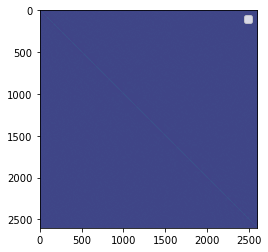

In [13]:
scaled_inv=np.linalg.pinv(cov,rcond=1e-15, hermitian=True)
plt.imshow(np.corrcoef(scaled_inv))
plt.legend()

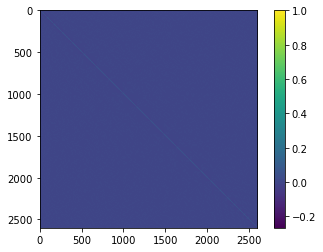

In [14]:
plt.imshow(np.corrcoef(np.linalg.inv(cov)))
plt.colorbar()

In [13]:
import asdf

In [14]:
path = "/global/cfs/cdirs/desi/public/cosmosim/AbacusSummit/ic/AbacusSummit_fixedbase_c000_ph099/"

In [16]:
af = asdf.open(path+"ic_dens_N576.asdf", lazy_load = False)
dens = af["data"]["density"]

ValueError: Supported compression types are: ['zlib', 'bzp2', 'lz4', 'input'], not 'blsc'

In [1]:
import pyasdf

/global/homes/s/shreeb/anaconda3/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(


In [12]:
af = pyasdf.ASDFDataSet(path+'ic_dens_N576.asdf',('gzip', 0))
dens = af["data"]["density"]

PermissionError: [Errno 13] Unable to open file (unable to open file: name = '/global/cfs/cdirs/desi/public/cosmosim/AbacusSummit/ic/AbacusSummit_fixedbase_c000_ph099/ic_dens_N576.asdf', errno = 13, error message = 'Permission denied', flags = 1, o_flags = 2)